![](https://www.nasa.gov/sites/default/files/thumbnails/image/nh_pluto_10.png)

*Source* [https://www.nasa.gov](https://www.nasa.gov)


# Introduction


In this example, we focus on modelling the *partial differential equation* with a *nonlinear boundary conditions*. We choose the problem of thermal equilibrium of the Pluto planet.The planet model is oversimplified. However, it serves the purpose; this example shows how to linearize partial differential equations and apply the Newton method.  

MoFEM is generic code, and other processes (chemical reactions, radioactive decay, etc.) can be included, to fit better reality. For example, an interesting modelling avenue would be to apply multi-scale analysis, with separate scales for space and time for processes on the surface and subsurface, or model extension to model transport phenomena with reaction-diffusion equation, or near surface convection diffusion problem.

# Part I

## Energy balance


### Conservation law

The universal law of nature, that energy has to be conserved, that with the help of [divergence theorem](https://en.wikipedia.org/wiki/Divergence_theorem) and [principle of locality](https://en.wikipedia.org/wiki/Principle_of_locality), can be expressed for every point of the body as follows,   

\begin{equation}
\sum^2_{i=0} \frac{\partial q_i}{\partial x_i} - f(\mathbf{x}) = 0,\quad\forall \mathbf{x} \in \Omega
\label{eq:conservation1} \tag{1}
\end{equation}

where:
- $\mathbf{x}$ is point coordinates in [Cartesian coordinate system](https://en.wikipedia.org/wiki/Cartesian_coordinate_system) in body $\Omega$,
- $\mathbf{q}$ is energy flux $[W \cdot m^{-2}]$, and $q_i$ is coefficient of energy flux, where $i=0,1,2$.  For example, $f(\mathbf{x})$ is an energy source, which results from the decay of radioactive materials, or chemical processes, or internal friction caused by changing gravity. We will set source term to zero, to keep it simple. 

Equation ($\ref{eq:conservation1}$) expressed with the indices applies to the Cartesian coordinate system only, to express it in the more abstract and general form we can write in absolute notation, as follows

\begin{equation}
\nabla \cdot \mathbf{q} - f(x) = 0,\quad\forall \mathbf{x} \in \Omega
\label{eq:conservation2} \tag{2}
\end{equation}

where $\nabla \cdot$ is divergence symbol. Note that we later solve problem in cylindrical coordinate system, were equation expressed $(\ref{eq:conservation1})$ is not valid for such system, however absolute notation $(\ref{eq:conservation2})$ holds.

### Thermal conduction

The conection between energy flux and temerature gradient is given by [Fourier's law](https://en.wikipedia.org/wiki/Thermal_conduction#Fourier's_law), 

\begin{equation}
q_i(\mathbf{x}) = - k(\mathbf{x}) \frac{\partial T(\mathbf{x})}{\partial x_i}
\label{eq:furier1} \tag{3}
\end{equation}

where:
- $T(\mathbf{x})$ is temperature at point $\mathbf{x}$,
- $\frac{\partial T(\mathbf{x})}{\partial x_i}$ is gradient of temperature, where $i=0,1,2$,
- $k(\mathbf{x})$ heat conductivity $[W\cdot m^{-2}]$ at point $\mathbf{x}$ in the body.

Furrie's law expresses observation that heat transfer rate is proportional to the negative gradient of temperature, i.e. heat energy flows from hot region to cold region. Furrie's law is a particular expression of the second law of thermodynamics. In the following, we assume that heat conductivity is homogenous through the planet, and its value is the average value for the rock. 

The thermal conduction law expressed in absolute notation takes form as follows

\begin{equation}
\mathbf{q}(\mathbf{x}) = - k \pmb\nabla T
\label{eq:furier2} \tag{4}
\end{equation}


## Exchange of energy with the external world

Pluto exchange energy and mass with the universe through the surface, for simplicity, we restrict ourself to two cases, i.e. sun irradiance, planet and outer space radiation. Total power of energy exchange through the surface is given by

\begin{equation}
P = \int_\Gamma dP = \int_\Gamma dP^S + dP^r \quad [W]
\label{eq:boundary} \tag{5}
\end{equation}

where:
- $\Gamma$ is surface of the planet,
- $dP^S$ is power surface infinitesimal element irradiation received from the sun,
- $dP^r$ is power surface infinitesimal element radiation/


### Pluto’s insolation


Following [Pluto's insolation history](https://doi.org/10.1016/j.icarus.2014.12.028) we assume that energy flux from sin is 

\begin{equation}
dP^S(\mathbf{x},t) = I * dA \quad [W]
\label{eq:solar_raddiation1} \tag{6}
\end{equation}

where:
- $I$ $[W\cdot m^{-2}]$ is isolation valuees value take from [Pluto’s insolation history](https://doi.org/10.1016/j.icarus.2014.12.028),
- $\mathbf{N}^S(t)$ is unit solar ray direction,
- $d\mathbf{A}$ is surface area element.

![](http://mofem.eng.gla.ac.uk/mofem/html/pluto_insolation.png)

*Pluto's insolation

From [Pluto's insolation history](https://doi.org/10.1016/j.icarus.2014.12.028), Pluto's motion is complex in time due to its elliptical and eccentric orbit. To keep analysis simple, we arbitrary pick data for one full orbit (1767), where north and south pole have averaged isolation values $260$ $[W\cdot m^{-2}]$, and on the equator $260$ $[W\cdot m^{-2}]$. For simplicity, we will use

\begin{equation}
I = -0.23 - 0.3 \sin{(\theta)}
\label{eq:solar_raddiation2} \tag{7}
\end{equation}

where $\theta$ is altitude of point $\mathbf{x}$ on Pluto surface, see [Horizontal_coordinate_system](https://en.wikipedia.org/wiki/Horizontal_coordinate_system). 


### Body and space radiation

We will assume that surface of Pluto radiates energy in the space; it also receives energy from space, which has some relict temperature. We assume that outer space temperature is 3K degrees, following Wikipedia (https://en.wikipedia.org/wiki/Outer_space). Balance of energy received by radiation be quantified by [Plank's law](https://en.wikipedia.org/wiki/Planck%27s_law) integrated by all possible wave frequencies, see https://en.wikipedia.org/wiki/Thermal_radiation. Finally, you can express our ideas into the equation

\begin{equation}
dP^r(\mathbf{x}) = \epsilon \sigma (T^4(\mathbf{x})-T_S^4) dA \quad [W]
\label{eq:solar_raddiation4} \tag{8}
\end{equation}

where:
- $dP^r$ is net thermal surface element radiation,
- $\epsilon$ is emissivity,
- $\sigma$ is [Stefan–Boltzmann constant](https://en.wikipedia.org/wiki/Stefan–Boltzmann_law),
- $T(\mathbf{x})$ is temperature on Pluto surface at position $\mathbf{x}$,
- $T_S$ is temperature of space,
- $d\mathbf{A}$ is surface area element.
- $\mathbf{x}$ is position.

For simplicity, we will set $\epsilon=1$, assuming that radiation if for the black body. That might be true for outer space radiation but is not true for Pluto surface. However, it could be good enough approximation, considering that it is very cold on this planet, and the surface is rough, porous with the potentially large intrinsic surface area.

## Equations in strong form

Putting all equations together, we get boundary value problem in the indicess for Cartesian coordinate system
\begin{equation}
\left\{
\begin{array}{l}
\frac{\partial}{\partial x_i} \left( k \frac{\partial T}{\partial x_i} \right)\quad \forall \mathbf{x} \in \Omega, \\
q_i dA_i = dP^S + dP^r \quad\forall \mathbf{} \in \Gamma
\end{array} 
\right.
\label{eq:strong1} \tag{9}
\end{equation}
Note that we drop $\sum$ symbol in ($\ref{eq:conservation1}$), following [Einstein notation](https://en.wikipedia.org/wiki/Einstein_notation). Also, following Einstein notation, $q_i dA_i = \sum_{i=0}^2 q_i dA_i$.

When problem is expressed in that form, we call it that it is strong form. For clarity, we express above equation in coordinate system independent absolute notation 
\begin{equation}
\left\{
\begin{array}{l}
\nabla \cdot \left( k \pmb\nabla T \right) = 0\quad\forall \mathbf{x} \in \Omega, \\
\mathbf{q}\cdot d\mathbf{A} = dP^S + dP^r \quad\forall \mathbf{x} \in \Gamma.   
\label{eq:strong2} \tag{10}
\end{array} 
\right.
\end{equation}

This is a nonlinear partial differential equation since radiation is a nonlinear function of unknown distribution of temperature. You can notice as well that time does not explicitly is involved in the equations. This is a consequence of the assumptions above. We are looking at long periods, like time over several Plutos years (Pluto orbit has ~248 years), where average values are our initial interest.



# Part II


## Running code. 

In [1]:
# Running code

# -ts_dt step size
# -ts_max_time 1 final time, should be always 1, since that correspond to accurate solar irradiation
# -snes_rtol relative tolearnce
# -snes_atil absolute tolerance
# -snes_linesearch_type line searcher type (see https://www.mcs.anl.gov/petsc/petsc-current/docs/manualpages/SNES/SNESLineSearchType.html)

dt = 1e-1
snes_rtol = 1e-12
snes_atol = 1e-12
log_file = "log.txt"
wd="/mofem_install/um_view/tutorials/scl-8"

!cd {wd} && ./radiation \
-file_name pluto.h5m \
-ts_dt {dt} \
-ts_max_time 1 \
-snes_rtol {snes_rtol} \
-snes_atol {snes_atol} \
-snes_max_it 20 \
-snes_linesearch_type bt 2>&1 | tee {log_file}

[0] <inform> MoFEM version 0.10.1 (MOAB 5.2.1 Petsc Release Version 3.11.4, Sep, 28, 2019 )
[0] <inform> git commit id SHA1-NOT FOUND
[0] <inform> Local time: 2021-1-5 13:50:43
[0] <inform> UTC time: 2021-1-5 13:50:43
[0] <inform> [FieldCore] Add field T field_id 1 space H1 approximation base AINSWORTH_LEGENDRE_BASE rank 1 meshset 12682136550675316742
[0] <inform> [FECore] Add finite element dFE
[0] <inform> [FECore] Add finite element bFE
[0] <inform> [ProblemCore] Add problem SimpleProblem
[0] <inform> [FieldCore] Number of dofs 2668
[0] <inform> [FECore] Finite element dFE added. Nb. of elements added 571
[0] <inform> [FECore] Finite element bFE added. Nb. of elements added 65
[0] <inform> [FECore] Number of adjacencies 4192
[0] <inform> [ProblemsManager] SimpleProblem Nb. local dof 2668 by 2668 nb global dofs 2668 by 2668
[0] <inform> [ProblemsManager]  FEs ghost dofs on problem SimpleProblem Nb. ghost dof 0 by 0 Nb. local dof 2668 by 2668
[0] <inform> [petsc] 0 TS dt 0.1 time 0.
[

## Creating VTK file

In [2]:
# Convert h5m file into VTK file
!cd {wd} && /mofem_install/um_view/bin/mbconvert out_radiation.h5m out_radiation.vtk
!ls {wd}

Read "out_radiation.h5m"
Wrote "out_radiation.vtk"
log.txt		     out_radiation.h5m	pluto.h5m    radiation
myscreenshot.png     out_radiation.vtk	pluto.ipynb
newton_log_file.txt  param_file.petsc	pluto.jou


## Printing Newton iterations and time stepping

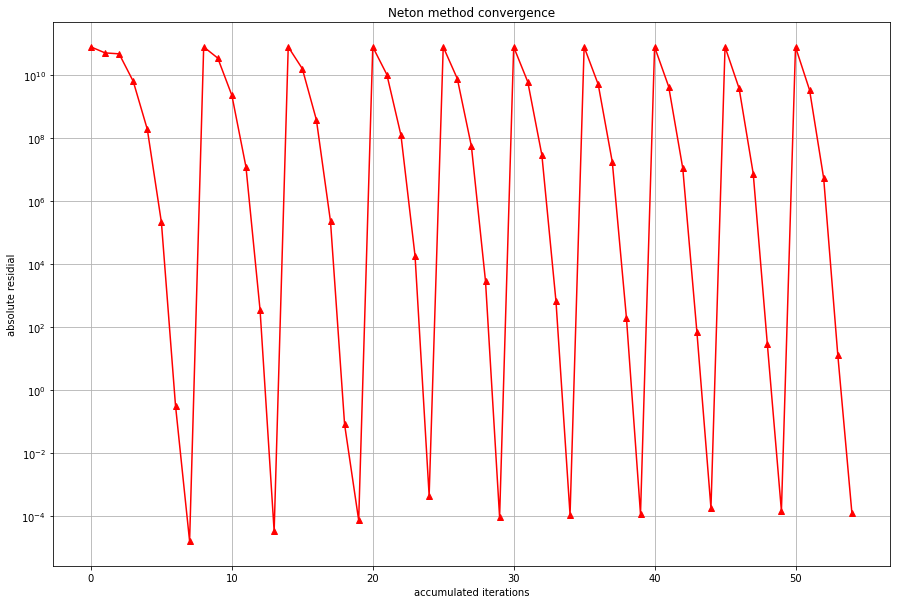

In [3]:
newton_log_file="newton_log_file.txt"
!cd {wd} && grep "SNES Function norm" {log_file} > {newton_log_file} 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
newton_data=pd.read_fwf(wd+"/"+newton_log_file, header=None)

plt.rcParams['figure.figsize'] = [15, 10]
plt.plot(newton_data[7].to_numpy(),'r^-')
plt.title('Neton method convergence')
plt.ylabel('absolute residial')
plt.xlabel('accumulated iterations')
plt.yscale('log')
plt.grid(True)
plt.show()

## Plotting solution on mesh and temperature distribution

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

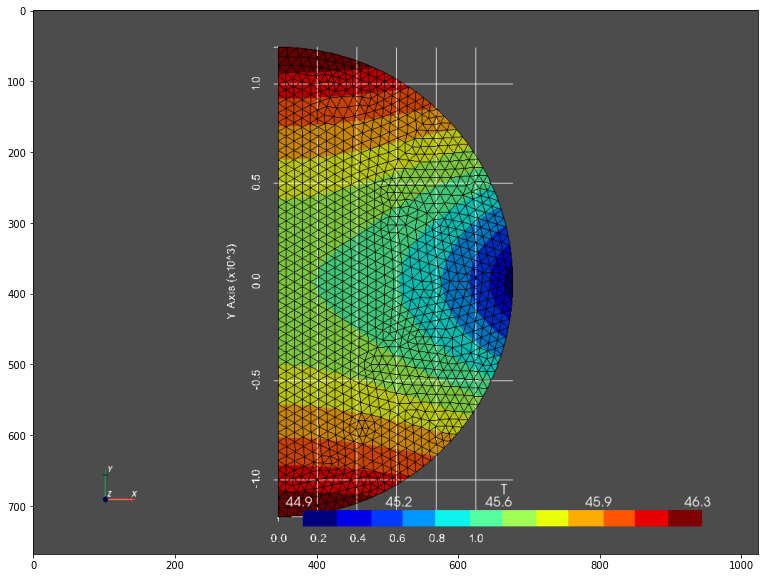

In [6]:
# Plot solution
import pyvista as pv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
mesh = pv.read(wd+'/'+'out_radiation.vtk')
my_cmap = plt.cm.get_cmap("jet", 12)

# Take a screen shot
mesh.plot(
    screenshot=wd+'/myscreenshot.png',
    show_grid=True,
    show_edges=True,
    cpos="xy",
    scalars="T", 
    smooth_shading=True, 
    cmap=my_cmap)

# Print a screen shot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(wd+'/myscreenshot.png')
imgplot = plt.imshow(img)
plt.show()


# Part III

## Equations in weak form

Working with partial differential equations (PDEs) is hard for a computer. Computers are excellent with adding, subtracting and multiplying, but not with solving abstract PDEs. Over many years, many mathematical methods has bee invented which can transform PDEs into the algebraic equations, and then series of linear equations, which can be solved efficiently by computer.

One of the methods which change PDEs into the algebraic equation is the [Galerkin method](https://en.wikipedia.org/wiki/Galerkin_method). If Galerie is used with a particular method of dividing the computational domain and construction of the piecewise polynomial base, it leads to the Finite Element Method (FEM).  Here we skip those details related to FEM and focus on formulation problem in a weak form and linearisation.

We take first equation from the strong form, multiply it by some sufficiently smooth functions $v$, multiply by it energy conservation equation, and integrate over domain, as result we get

\begin{equation}
\int_\Omega  v \frac{\partial}{\partial x_i} \left( k \frac{\partial T}{\partial x_i} \right) \textrm{d}V = 0.
\label{eq:weak1} \tag{11}
\end{equation}

We call function $v$ testing function, since it test if we satisfy equation $(\ref{eq:weak1})$. Of curse testing equation using one function $v$ is not enough, so we can take one by one many different $v$ functions and check if we fulfil equation (\ref{eq:weak1}) for each of them. In fact, we can have an infinite number of test functions $v$ against which we can test eq. (\ref{eq:weak1}). However,  that is impractical, since testing for an infinite number of functions will take forever. The solution is the discretisation of the problem, i.e. test functions and temperature can be approximately expressed by a finite number of base functions (e.g. shape functions in finite elements), multiplied by coefficients (e.g. degrees of freedom in finite elements). 

In the next step, we can [integrate by parts](https://en.wikipedia.org/wiki/Integration_by_parts) as follows

\begin{equation}
-
\int_\Omega  \frac{\partial v}{\partial x_i}   \left( k \frac{\partial T}{\partial x_i} \right) \textrm{d}V 
+
\int_\Gamma v q_i dA_i
= 0.
\label{eq:waak2} \tag{12}
\end{equation}

and replace the second term using the second equation from the strong form in part I, as result w have

\begin{equation}
-
\int_\Omega  \frac{\partial v}{\partial x_i}   \left( k \frac{\partial T}{\partial x_i} \right) \textrm{d}V 
+
\int_\Gamma v \left( dP^S + dP^r \right)
= 0
\label{eq:weak4} \tag{13}
\end{equation}

and finally

\begin{equation}
r(T(\mathbf{x})) = -
\int_\Omega  \frac{\partial v}{\partial x_i} \left( k \frac{\partial T}{\partial x_i} \right) \textrm{d}V 
+
\int_\Gamma v dP^S
+
\int_\Gamma v \left[
\epsilon \sigma (T^4(\mathbf{x})-T^4_S) 
\right]
dA
= 0
\label{eq:weak5} \tag{14}
\end{equation}

Note that now we have one equation, instead of two-equation, for body domain and boundary, we have one equation expressed in the integral form which has to be fulfilled for set of test functions $v$. When the problem is expressed in that way is called a weak form, and boundary condition applied for heat flux is called natural boundary condition. 

You can notice that initially second derivative was applied twice to the field of temperature $T(\mathbf{x})$, first time to calculate gradient, form which we get heat flux, the second time to divergence. By applying integration by parts, now one derivative form field of temperature $T(\mathbf{x})$ is "moved" to the test function $v(\mathbf{x})$. That is important, since not every function can have calculated integral when the second derivative is applied, like in ($\ref{eq:weak1}$). 

Suppose we like to search for a solution among a set of functions. It is much easier, since it is a bigger set, to search among functions that can have integrated only first derivative, such functions can be piecewise polynomials. 

Note, that piecewise polynomial enables us to approximate functions which have gradients jumps. Such functions have no integrable second derivatives, i.e. are not smooth enough. Moreover, piecewise polynomial is much easier to construct and implement efficiently, in particular in two or three dimensions. 

![](https://www.universetoday.com/wp-content/uploads/2008/05/Internal_Structure_of_Pluto.jpg)

*Source* www.universetoday.com

Suppose the solution to the problem is a function of temperature, which is [analytical](https://en.wikipedia.org/wiki/Analytic_function). Then a solution of strong form equation and weak form equation is the same in the sense of some appropriate norm. 

However weak form solution is more general and is applicable for problems where temperature distribution is non-analytical. For example, if we like to model Pluto that it has several internal layers, rock core, and outer core layers. Then weak form equation would give correct since at boundary between layers we could observe jumps of the temperature gradient, which can not be represented by an analytical function. From the other hand solution of strong form, equations will demand to divide domains into parts for each layer, and supplement equations by joining each part, enforcing continuity of displacement, and fluxes.  Note that in the model showed above layers are not modelled, and the whole planet is modelled as a homogenous rock.

## Linearisation

You can notice that equation (\ref{eq:weak5}) is nonlinear, residual $r(T(\mathbf{x}))$, which non-linear function of temperature, i.e. you can find terms like $T^4$ in the equation. Thus we have to linearise $r(T(\mathbf{x}))$, with the help comes [Taylor series](https://en.wikipedia.org/wiki/Taylor_series) expansion, which will lead to Newton method. 

We express distribution of temperature as previous value at Newton iteration $T_k(\mathbf{x})$ and temperature correction  $\delta T_{k+1}(\mathbf{x})$, such that current temperature is

\begin{equation}
T_{k+1}(\mathbf{x}) = T_k(\mathbf{x})+\delta T_{k+1}(\mathbf{x}).
\label{eq:taylor1} \tag{15}
\end{equation}

For convenience, we will write just $T_k$, instead of $T_k(\mathbf{x})$. 
Next, using Taylor series expansion, we get

\begin{equation}
r(T_k+\delta T_{k+1})=
r(T_k+\delta T_{k+1}) 
+ \left.\frac{\partial r}{\partial T}\right|_{T=T_k} \delta T_{k+1} 
+ \frac{1}{2!}\left.\frac{\partial^2 r}{\partial T^2}\right|_{T=T_k} (\delta T_{k+1})^2
+ \frac{1}{3!}\left.\frac{\partial^3 r}{\partial T^3}\right|_{T=T_k} (\delta T_{k+1})^3
+ \dots
= 0
\label{eq:taylor2} \tag{16}
\end{equation}

This infinite Taylor series, however, if $\delta T_{k+1}$ is small, then $(\delta T_{k+1})^2$ is very small, and following powers are even smaller. Using that observation we can drop all terms beyond the linear term and use $\delta T_{k+1}$ to correct residual, as follow 

\begin{equation}
r(T_k+\delta T_{k+1}) \approx 
r(T_k+\delta T_{k+1}) + \left.\frac{\partial r}{\partial T}\right|_{T=T_k} \delta T_{k+1} = 0. 
\label{eq:taylor3} \tag{17}
\end{equation}

Solving equation ($\ref{eq:taylor2}$) is hard, it is much easier to solve ($\ref{eq:taylor3}$). Solution of ($\ref{eq:taylor2}$) can be obtained by solving ($\ref{eq:taylor3}$) iteratively. Starting with $k=0$, then $k=1,2,3,\dots$, until $r(T_k+\delta T_{k+1})$ is small as much we like. If $r(T_k+\delta T_{k+1})$ is zero, or approaching zero, then solution we have solution of ($\ref{eq:weak5}).

This method is called the Newton method. Iteration is repeatedly repeating, the same thing in the loop, and computers are good in such a thing. You can notice that ($\ref{eq:taylor3}$) is an equation, where field $\delta T_{k+1}$ is unknown which we will try to find. The computer will do iterations; however, at each iteration, we will have to transform ($\ref{eq:taylor3}$) into a suitable form for the computer. Next subsection is about that. 

We know distribution of temperature at iteration $k$, i.e. $T_k$, since it assumed that it was calculated at previous iteration. We know what is form of $r(T_k)$, that is shown in eq. (\ref{eq:weak5}), to complete that section we need to derive how second term in ($\ref{eq:taylor3}$). That can be done simply by calculating derivative only nonlinear term $T^4$, 
\begin{equation}
\left.\frac{\partial r}{\partial T}\right|_{T=T_k} \delta T_{k+1} 
= -
\int_\Omega  \frac{\partial v}{\partial x_i} \left( k \frac{\partial \delta T_{k+1}}{\partial x_i} \right) \textrm{d}V 
+
\int_\Gamma v \left[
\epsilon \sigma \left\{ 4T^3_k \right\} \delta T_{k+1}
\right]
dA
\label{eq:taylor4} \tag{18}
\end{equation}

## Approximation

Next step of the procedure of changing nonlinear PDE into a series of linear equations, which computer can solve. First, for some class of problems, the unknown function of temperature in the body can be expressed by sum of some simpler functions as follows

\begin{equation}
\begin{split}
T_k(\mathbf{x}) 
&\approx
T^h_k(\mathbf{x}) =
\sum_{a=0}^{N-1} \phi_a(\mathbf{x}) \overline{T}^a_k \\
\delta T_k(\mathbf{x}) 
&\approx
\delta T^h_{k+1}(\mathbf{x}) =
\sum_{a=0}^{N-1} \phi_a(\mathbf{x}) \delta\overline{T}^a_{k+1} \\
v(\mathbf{x}) 
&\approx
v^h(\mathbf{x}) =
\sum_{b=0}^{N-1} \phi_b(\mathbf{x}) \overline{v}^b
\end{split}
\label{eq:approx1} \tag{19}
\end{equation}
where $N$ is a number of unknowns coefficients, e.g. $\overline{T}^a_{k+1}$, and in finite elements it is called number of degrees of freedom. In case of classical Lagrange finite elements, $N$ in this particular problem is equal to number of nodes, and $\phi_a$ in nodal function at node $a$. Nodal functions is picewise polynomial. Superscript $(\cdot)^h$, indicate that this is discretised solution, which depends on mesh which has some characteristic size of the element $h$. $N$ is intrinsically linked to size of mesh $h$, smaller elements in the mesh more nodes, bigger $N$.

Not going into the details, by increasing $N$, i.e. a number of base functions $\phi_a$, we approximation function $T^h$ converge to function $T$, in some norm. Norm is used measure distance two functions from each other. It means that solution of our PDE can be approximated with an arbitrary error, i.e. that distance between $T$ and $T^h$ is arbitrary small, as small as which we choose to have, depending on the size of the problem, i.e. $N$. Bigger $N$ then functions are closer to each other. Of course big $N$, means bigger problem, and more equations to solve. 

Replacing $T_k(\mathbf{x})$ and $\delta T_{k+1}(\mathbf{x})$, by $T^h_k(\mathbf{x})$ and $\delta T^h_{k+1}(\mathbf{x})$

\begin{equation}
\mathbf{r}(T^h_k(\mathbf{x})) = 
\mathbf{r}^h_a = 
-
\int_\Omega  \frac{\partial \phi_b}{\partial x_i} 
\left( k \frac{\partial T^h_k}{\partial x_i} \right) \textrm{d}V 
+
\int_\Gamma \phi_b dP^S
+
\int_\Gamma \phi_b \left[
\epsilon \sigma ((T^h_k)^4-T^4_s) 
\right]
dA
\label{eq:approx2} \tag{20}
\end{equation}

and

\begin{equation}
\mathbf{k}(T^h_k(\mathbf{x})) =
\mathbf{k}^h_{ba}
= -
\int_\Omega  \frac{\partial \phi_b}{\partial x_i} \left( k \frac{\partial \phi_a}{\partial x_i} \right) \textrm{d}V 
+
\int_\Gamma \phi_b \left[
\epsilon \sigma \left\{ 4(T^h_k)^3_k \right\} 
\right]
dA
\label{eq:approx3} \tag{21}
\end{equation}

where $\mathbf{r}^h_a$ is vector of size $N$, and $\mathbf{k}^h_{ba}$ is matrix $N$ by $N$. Having above at hand, we get holy grail of computational methods, i.e. system of linear equations, which now computer can solve,

\begin{equation}
\mathbf{r}(T^h_k + \delta T^h_{k+1}) \approx
\mathbf{r}^h_k + \mathbf{k}_k^h \delta\overline{T}_{k+1} = 0
\quad
\Rightarrow
\quad
\mathbf{k}_k^h \delta\overline{T}_{k+1} = -\mathbf{r}^h_k
\label{eq:approx4} \tag{22}
\end{equation}

which we can solve for $\delta\overline{T}_{k+1}$. Note that $\mathbf{k}_k^h$ and $\mathbf{r}^h_k$ for step $k$, and calculated value of unknown vector $\delta\overline{T}_{k+1}$  is for step $k+1$. Equation ($\ref{eq:approx4}$) is series of linear equation, which can solved efficiently.  


# Axisymmetric problem  

For computational efficiency, we assume that problem is axisymmetric. This is a case when the problem conveniently can be expressed in [cylindrical coordinate system](https://en.wikipedia.org/wiki/Cylindrical_coordinate_system). Temperature field can be expressed in the Cartesian coordinate system $T(\mathbf{x})=T(x,y,z)$, or equivalently in the cylindrical coordinate system $T(\mathbf{x})=T(r,z,\theta)$. When $T(r,z,0)=T(r,z,\theta)$ for all $\theta$, there is no change of temperature in the radial direction, then the problem can be simplified, and solved as an axisymmetric problem. That is justified because we are looking at longer times than single Pluto day, and we neglect the topological changes on the planet surface. The analysis can be done then calculated on 2d mesh, where the only slice of the planned is meshed, as in the example above.  

In axisymmetric case, in the finite element implementation, in all volume integrals above are expressed as follows,

\begin{equation}
\int_\Omega (\cdot) \textrm{d}V =
2\pi \int_r \int_z (\cdot) r \textrm{d}r\textrm{d}z  
\end{equation}

and surface integral is

\begin{equation}
\int_\Gamma (\cdot) \textrm{d}S =
2\pi \int_L (\cdot) r \textrm{d}l 
\tag{23}
\end{equation}


# Part IV

## Algorithm for the Newton method

Now we will make loops for the Newton method and time stepping. First, we will start with an internal loop of Newton method:

It 0: Initial residual r(T) = 1.0000e+01
It 0: T = 3.092593 dT = 0.092593
It 0: Absolute residual r(T) = 4.7256e-01
It 0: Relative residual r(T) = 4.7256e-02

It 1: T = 3.088598 dT = -0.003994
It 1: Absolute residual r(T) = 9.1471e-04
It 1: Relative residual r(T) = 9.1471e-05

It 2: T = 3.088591 dT = -0.000008
It 2: Absolute residual r(T) = 3.4479e-09
It 2: Relative residual r(T) = 3.4479e-10

It 3: T = 3.088591 dT = -0.000000
It 3: Absolute residual r(T) = 1.4211e-14
It 3: Relative residual r(T) = 1.4211e-15

Convergeded relative criterion


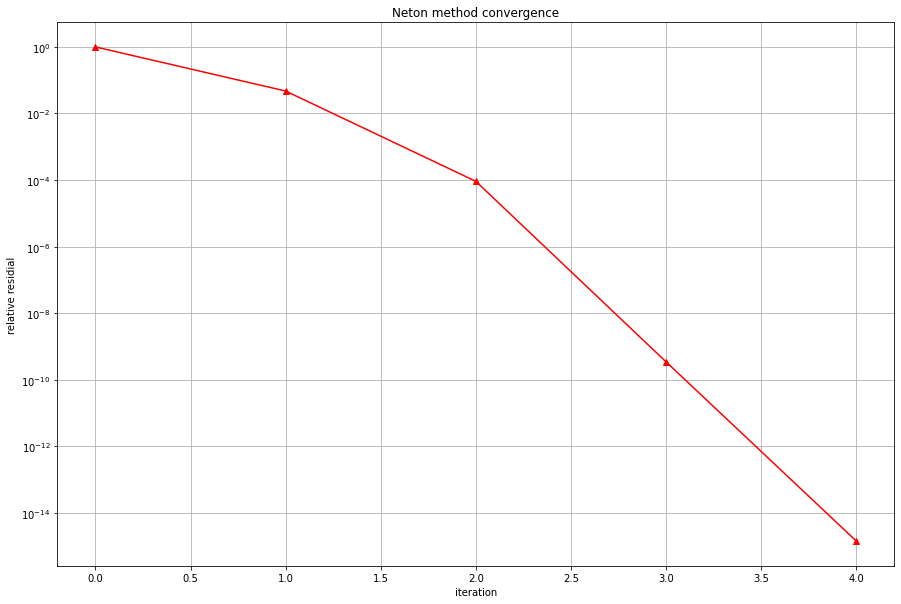

Estimated order of convergence: 1.9997e+00


In [5]:
# max_it - maximal number of iterations
# snes_atol - absolut tolerance
# snes_rtol - relative tolerance

import numpy as np
import matplotlib.pyplot as plt

def newton(res, Kt, T, snes_atol, snes_rtol, max_it):
    
    res0 = res_k = res(T)
    print("It 0: Initial residual r(T) = %3.4e" % abs(res_k))

    arr = [1]
    
    for k in range(0,max_it): 
    
        if abs(res_k) < snes_atol:
            print("Convergeded absolute criterion")
            break
        
        if abs(res_k/res0) < snes_rtol:
            print("Convergeded relative criterion")
            break
    
        dT = - (1./Kt(T))*res_k
        T = T+dT
        res_k = res(T)
        arr = np.append(arr, abs(res_k/res0))
        
        print("It %i: T = %f dT = %f" % (k,T,dT))
        print("It %i: Absolute residual r(T) = %3.4e" % (k, abs(res_k)))
        print("It %i: Relative residual r(T) = %3.4e" % (k, abs(res_k/res0)))
        print()
        
    if abs(res_k) > snes_atol and abs(res_k/res0) > snes_rtol:
        print("Newton method not converged")  
        
    return [T,arr]

def res(T):
    flux = 10
    T_space = 3
    return pow(T,4) - pow(T_space,4) - flux

def Kt(T):
    return 4*pow(T,3)    
     
[Tsol,arr] = newton(res, Kt, 3, 1e-14, 1e-14, 10)  

plt.rcParams['figure.figsize'] = [15, 10]
plt.plot(arr,'r^-')
plt.title('Neton method convergence')
plt.ylabel('relative residial')
plt.xlabel('iteration')
plt.yscale('log')
plt.grid(True)
plt.show()

def cal_log(arr, k):
    return np.log(abs(arr[k+1]-arr[k])/abs(arr[k]-arr[k-1]))

def calc_rate(arr, k):
    return cal_log(arr, k)/cal_log(arr, k-1)

print("Estimated order of convergence: %3.4e" % calc_rate(arr, len(arr)-2))


This is how Newton method looks; it is evaluating residual $\mathbf{r}$, matrix $\mathbf{k}$, at every iteration.  Next, solve a linear system of equations, and finally, check if residual is small. To check convergence,  criteria to stop Newton iterations are set. One criterion checking absolute residual, other relative residual. In some other cases, criterion on the norm of $dT$ increment can be set, or change of system energy. The matrix  $\mathbf{k}$ is often called the tangent stiffness matrix (that term comes from structural analysis).

Here we have a relatively simple function. In general, the key difficulty for more complex problems is to calculate correctly tangent matrix $\mathbf{k}$. That is essential to achieve a quadratic rate of convergence. The Newton method iterations are costly for big problems, and "quadratic" order of convergence allows to obtain solution fast.  

## Substepping

Newton method is conditionally stable; it converges if the initial guess is close enough to the solution. The initial solution has to be in so-called "convergence ball" if it is outside of it, Newton methods diverge, i.e. not yield a meaning solution. In that case, substepping can help. Another technique improving convergence is a line-searcher method, which is used in Pluto example. However, we will skip the description of line-searcher for another occasion. 

If Pluto is not subjected to sun irradiation, then it is easy to guess the solution, since it is in thermal equilibrium with outer space. In that case, the temperature is uniform over the whole planet and is equal to ambient temperature. We can exploit that, by slowly increasing flux from Sun irradiation until we reach desired real value.  

Algorithms can look as follows:

In [6]:
step_arr = []
for t in np.arange(0.0, 1.25, 0.25):
    print("Psudo time %f" % t)
    
    def res(T):
        flux = t*100
        T_space = 3
        return pow(T,4) - pow(T_space,4) - flux
    
    
    [Tsol,arr] = newton(res, Kt, 3, 1e-12, 1e-12, 10)
    step_arr = np.append(step_arr, arr)
    print()

Psudo time 0.000000
It 0: Initial residual r(T) = 0.0000e+00
Convergeded absolute criterion

Psudo time 0.250000
It 0: Initial residual r(T) = 2.5000e+01
It 0: T = 3.231481 dT = 0.231481
It 0: Absolute residual r(T) = 3.0452e+00
It 0: Relative residual r(T) = 1.2181e-01

It 1: T = 3.208921 dT = -0.022561
It 1: Absolute residual r(T) = 3.1743e-02
It 1: Relative residual r(T) = 1.2697e-03

It 2: T = 3.208680 dT = -0.000240
It 2: Absolute residual r(T) = 3.5634e-06
It 2: Relative residual r(T) = 1.4253e-07

It 3: T = 3.208680 dT = -0.000000
It 3: Absolute residual r(T) = 5.6843e-14
It 3: Relative residual r(T) = 2.2737e-15

Convergeded absolute criterion

Psudo time 0.500000
It 0: Initial residual r(T) = 5.0000e+01
It 0: T = 3.462963 dT = 0.462963
It 0: Absolute residual r(T) = 1.2811e+01
It 0: Relative residual r(T) = 2.5622e-01

It 1: T = 3.385842 dT = -0.077121
It 1: Absolute residual r(T) = 4.2163e-01
It 1: Relative residual r(T) = 8.4326e-03

It 2: T = 3.383127 dT = -0.002716
It 2: A

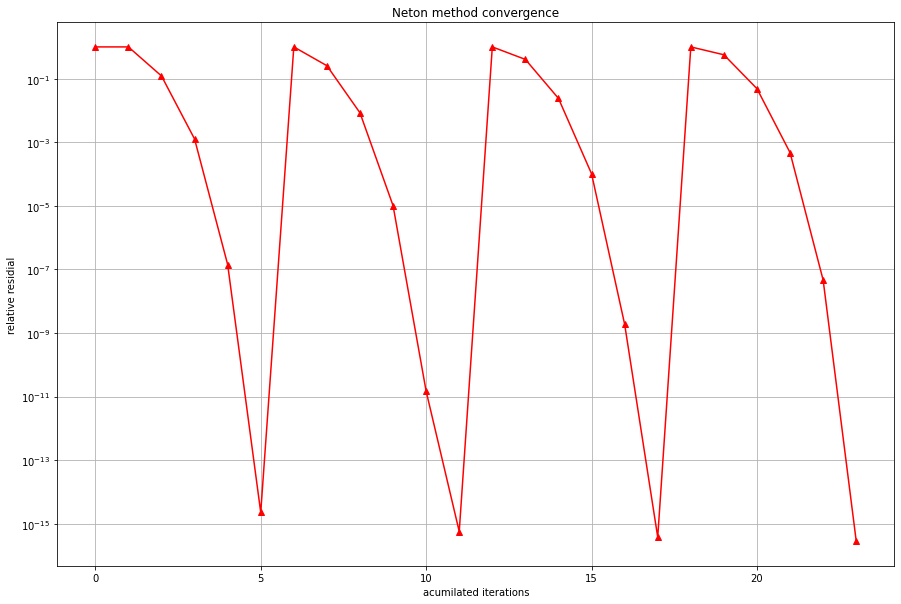

In [7]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.plot(step_arr,'r^-')
plt.title('Neton method convergence')
plt.ylabel('relative residial')
plt.xlabel('acumilated iterations')
plt.yscale('log')
plt.grid(True)
plt.show()

Note that this plot looks very similar to plot obtained for axisymmetric model of Pluto planet directly calculated in MoFEM.

# Final remarks

Look into the C++ code.